<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/face_extracting_haar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

face_list = pd.read_csv('drive/My Drive/Colab Notebooks/tibame_project/gender_identifying/face_data_train.csv')
face_list

,File Name,Gender,Race,Age
0,49_1_0_20170117160609295.jpg,Female,White,49
1,28_1_0_20170117180702119.jpg,Female,White,28
2,26_1_0_20170116184526152.jpg,Female,White,26
3,64_0_0_20170111204813415.jpg,Male,White,64
4,30_0_0_20170117131018041.jpg,Male,White,30
...,...,...,...,...
9489,63_1_4_20170110180156105.jpg,Female,Others,63
9490,69_1_4_20170110141201824.jpg,Female,Others,69
9491,18_1_4_20170109212430115.jpg,Female,Others,18
9492,19_1_4_20170109192214298.jpg,Female,Others,19


## Face extracting
1. Crop face from images.
2. Put them into numpy array (x_train).

In [2]:
from urllib.request import urlretrieve
import numpy as np
import cv2

url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt2.xml'
urlretrieve(url, 'haarcascade_frontalface_alt2.xml')
hc = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')


# create container
data_size = len(face_list)
x_train = np.empty((data_size, 224, 224, 3), dtype='uint8')

pgs = 0
fail_num = 0

# extract face from every image
for i in range(data_size):
    # load image
    img = cv2.imread('drive/My Drive/Datasets/UTKFace/img/' + face_list['File Name'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # face identifying
    bbox = hc.detectMultiScale(img, minNeighbors=1, minSize=(10,10))
    
    # inspect result of identifying
    if bbox != ():
        # crop if success
        area = 0
        for x, y, w, h in bbox:
            if w*h > area:
                area = w*h
                (x_, y_, w_, h_) = (x, y, w, h)
        
        img = img[y_:y_+h_, x_:x_+w_]
    else:
        fail_num += 1

    # resize and scale to [0, 1]
    img = cv2.resize(img, (224,224))

    # put into the container
    x_train[i] = img

    # progress bar
    pgs += 1
    print('\r' + '[Cropping]:[%s%s]%d/%d' % ('█' * int(pgs*30/data_size),
                                              ' ' * (30-int(pgs*30/data_size)),
                                              i, data_size), end='')
    
print('\nFial to crop:',  fail_num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[Cropping]:[██████████████████████████████]9493/9494
Fial to crop: 270


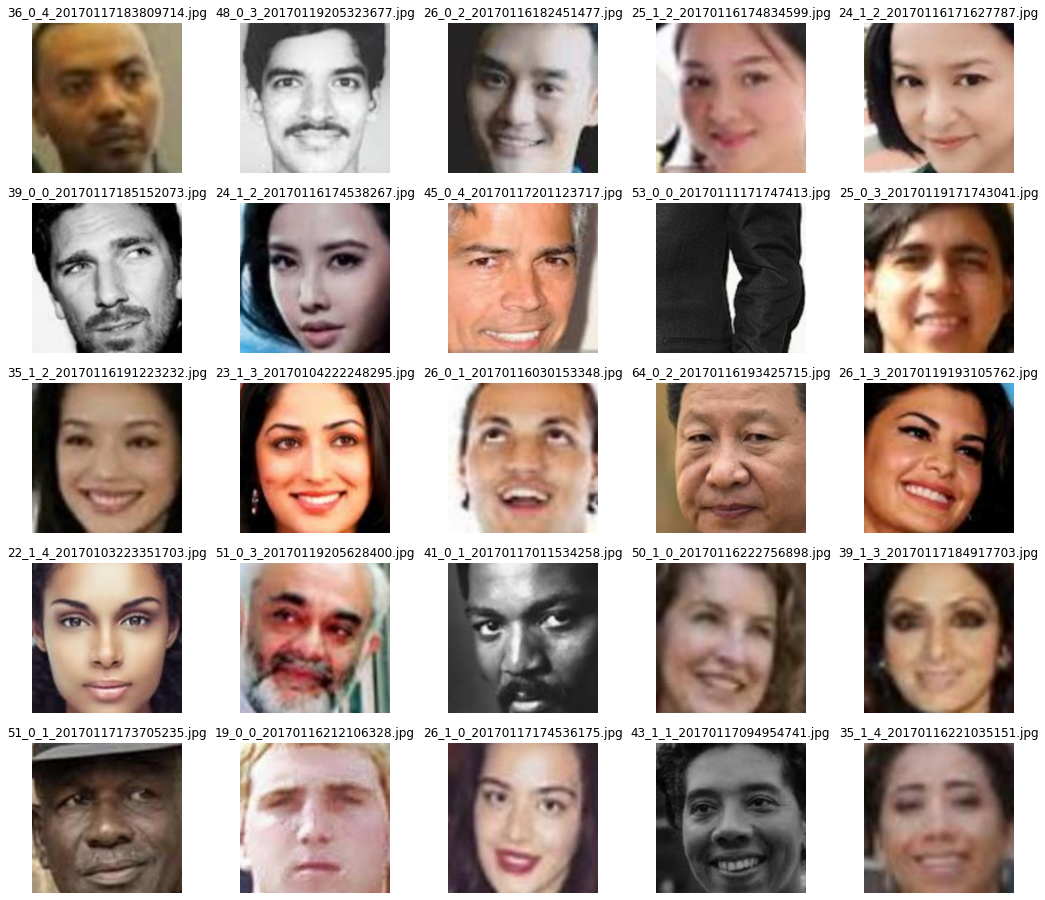

In [3]:
"""Inspect result"""

import matplotlib.pyplot as plt
import random

rid = random.choices(np.arange(data_size), k=25)

plt.figure(figsize=(18, 16))

for i, n in enumerate(rid):
    plt.subplot(5, 5, i+1)

    title = face_list['File Name'][n]
    plt.title(title)
    plt.axis(False)
    plt.imshow(x_train[n])

plt.show()

In [4]:
# save
np.save('drive/My Drive/Colab Notebooks/tibame_project/gender_identifying/face_crop_haar.npy', x_train)